In [70]:
import skimage as sk
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from copy import copy
import napari

In [83]:
image = sk.io.imread('./domes/Nice Domes/7')
image_denoise = sk.io.imread('./domes/domes_n2v/70_denoised.tif')

In [84]:
viewer = napari.Viewer()

viewer.add_image(image_denoise)

<Image layer 'image_denoise' at 0x238a20c0210>

In [ ]:
viewer = napari.Viewer()

viewer.add_image(image)

(array([[89., 28.,  7., ...,  0.,  0.,  0.],
        [84., 31.,  8., ...,  0.,  0.,  0.],
        [83., 30.,  9., ...,  0.,  0.,  0.],
        ...,
        [73., 12.,  3., ...,  0.,  0.,  0.],
        [74., 13.,  4., ...,  0.,  0.,  0.],
        [68., 20.,  8., ...,  0.,  0.,  0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 128 BarContainer objects>)

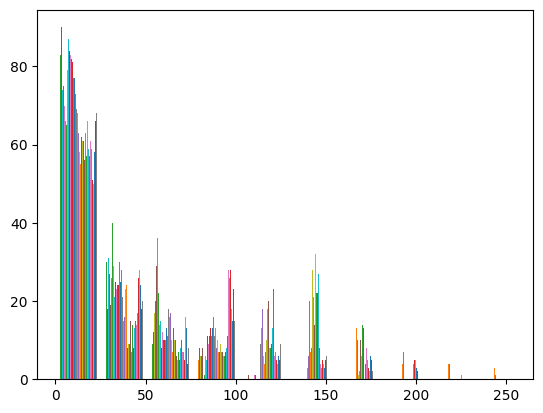

In [80]:
def patch_semi(im, sq=128, sq_o = 32):
    h, w = im.shape
    patches = []
    for y in range(0, h-sq+1, sq_o):
        for x in range(0, w-sq, sq_o):
            patch = im[y:y+sq, x:x+sq]
            min_value = np.min(patch)
            max_value = np.max(patch)
            patch_norm = (patch - min_value) / (max_value - min_value)*255
            # im = gaussian_filter(im, sigma=0.1)
            patches.append(patch_norm)
    return np.array(patches)

            
    
    
patches = patch_semi(image_denoise[112])
viewer.add_image(patches[115].astype(np.uint8))

plt.hist(patches[115])

# edges = cv.Canny(patches[115].astype(np.uint8), threshold1=20, threshold2=1)
# viewer.add_image(edges)
    

In [45]:
def clean_image(im):
    non_zero_cols = np.any(im != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
    return (clean_image)
    
def compute_mean_no_zeros(im):
    '''
    Compute the mean pixel intensity of the image.
    '''
    return np.mean(clean_image(im))

2935.81 23.455328
76.21186447585049


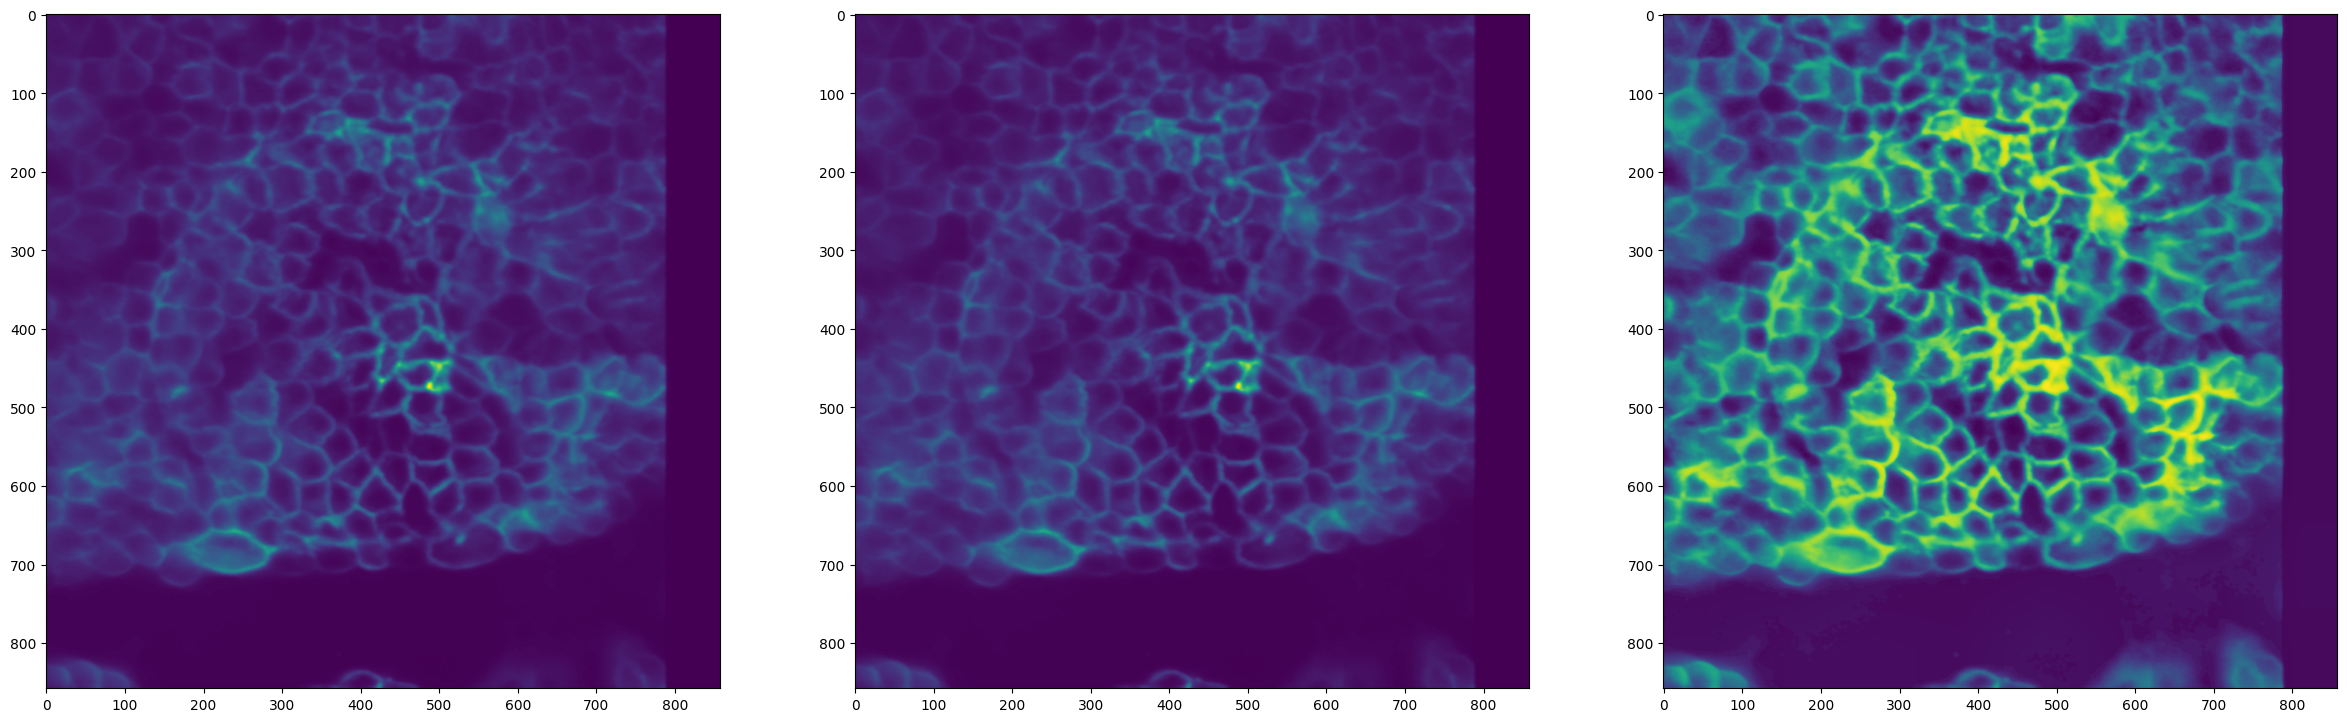

In [61]:
im = image_denoise[5][484]

plt.figure(figsize=(40,20))
plt.subplot(1,4,1)
plt.imshow(im)

print(im.max(), im.min())
im = im/im.max()
im = im*255

im = im.astype(np.uint8)
# im = cv.equalizeHist(im)

plt.subplot(1,4,2)
plt.imshow(im)

clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
im = clahe.apply(im)
# im = cv.equalizeHist(im)

print(compute_mean_no_zeros(im))

# im[im<(compute_mean_no_zeros(im))] = 0


plt.subplot(1,4,3)
plt.imshow(im)

In [60]:
viewer = napari.Viewer()
viewer.add_image(gaussian_filter(im, sigma=1))

<Image layer 'Image' at 0x23822661810>

In [69]:
viewer = napari.Viewer()
viewer.add_image(image_denoise[5])

<Image layer 'Image' at 0x2408f32c790>

In [63]:
def adjust_hist(im_i):
    im_h = []
    for im in im_i:
        im = im/im.max()
        im = im*255
        im = im.astype(np.uint8)
        clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
        im = clahe.apply(im)
        im_h.append(im)
    im_h = np.array(im_h)
    return (im_h)

In [68]:
viewer = napari.Viewer()
viewer.add_image(adjust_hist(image_denoise[5]))

<Image layer 'Image' at 0x23881d71cd0>

### Try to skeletonize the image. The problem with cellpose remains on the bad quality of the cell membrane.

In [74]:
w_im = image_denoise[5]
viewer = napari.Viewer()
viewer.add_image(w_im)

<Image layer 'w_im' at 0x2389a1d9850>

In [77]:
def skeletonize(im):
    skeleton=[]
    for i in im:
        i = sk.morphology.skeletonize(i)
        skeleton.append(i)
    return np.array(skeleton)

skeleton = skeletonize(w_im)

viewer.add_image(skeleton)

<Image layer 'skeleton' at 0x2389b93c7d0>

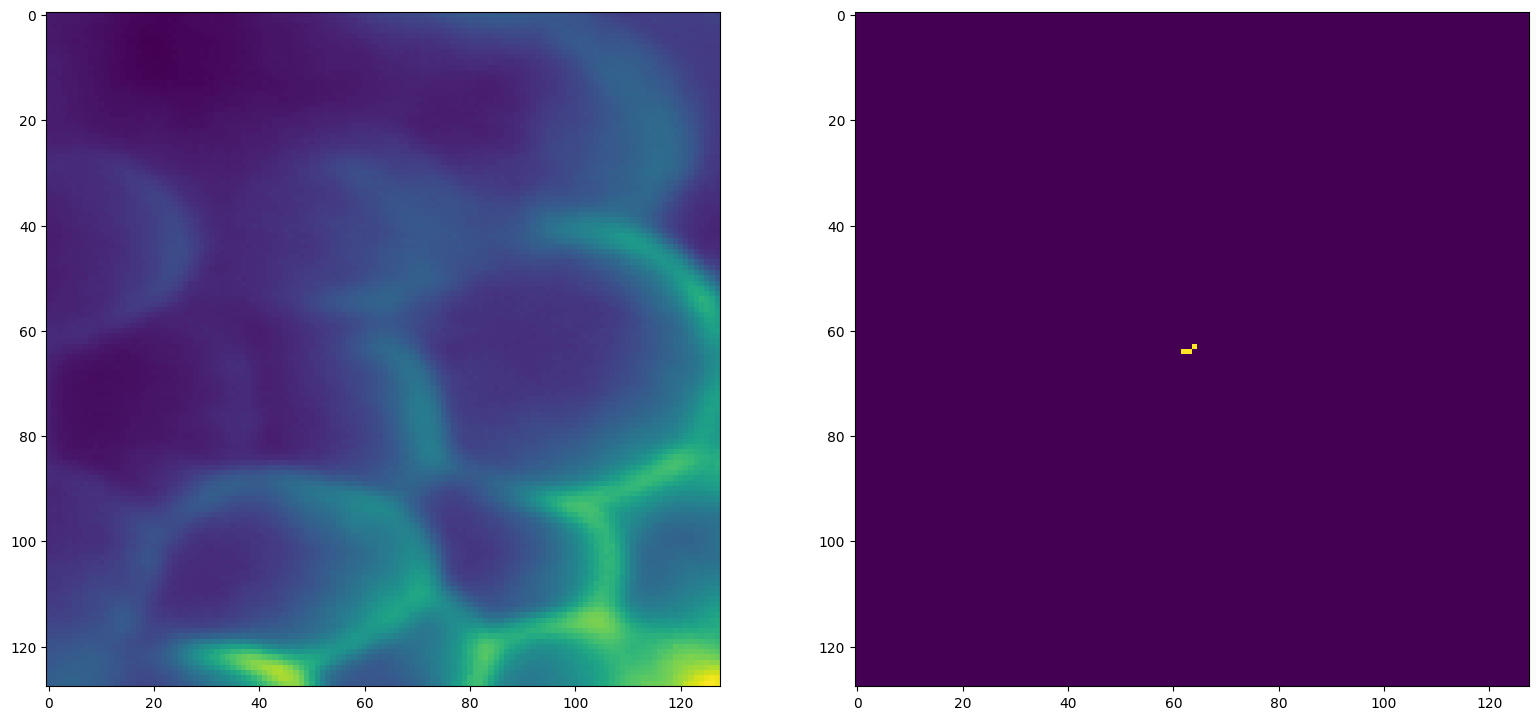

In [82]:
ww_im = w_im[465][100:228, 100:228]

plt.figure(figsize=(40,20))
plt.subplot(1,4,1)
plt.imshow(ww_im)
plt.subplot(1,4,2)
plt.imshow(sk.morphology.skeletonize(ww_im))